In [2]:
#Here we test the time dilation due to velocity and gravitation

In [3]:
import numpy as np
from numpy import sqrt, pi
import matplotlib.pyplot as plt

In [18]:
c = 2.998E8 #speed of light (m/s)
G = 6.674E-11 #gravitational constant (m^3/kg/s^2)
M = 5.97E24 #Earth's mass (kg)
r1 = 6.371E6 #radius of Earth (m)
r2 = rEarth + 2.02E7 #orbit radius of GPS (m)
spd = 8.64E4 #seconds per day (s)

v1 =  2*pi*r1/spd #tangental speed of clock at equator (m/s)
v2 = 2*pi*r2/(spd/2) #GPS satellites orbit twice per day (m/s)

In [28]:
#now we can calculate the combined time dilation
dt = sqrt((c**2-v2**2-2*G*M/r2)/(c**2-v1**2-2*G*M/r1))

#the dilation per day is 
dpd = spd*(dt-1)

In [29]:
#this is consistent with approximate value 38 microseconds
dpd

3.862797441911425e-05

In [35]:
#now that we know it works, we can have some fun
#let's see how this changes assuming changes in the satellite's altitude
def dailydilation(r2):
    v2 = 2*pi*r2/(spd/2)
    return spd*(sqrt((c**2-v2**2-2*G*M/r2)/(c**2-v1**2-2*G*M/r1)) - 1)

In [51]:
#range of altitudes
alt = np.linspace(r1, r2*3, 100)
#array of daily total time dilations
dts = [dailydilation(a)*1E6 for a in alt]

In [63]:
rISS = r1 + 4.215E5 
rISS, r1

(6792500.0, 6371000.0)

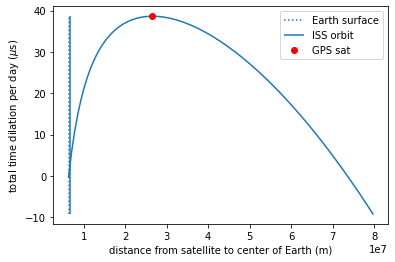

In [66]:
#Plotting
plt.plot(alt, dts)
plt.vlines(r1, min(dts), max(dts), ls='dotted', label='Earth surface')
plt.vlines(rISS, min(dts), max(dts), ls='-', label='ISS orbit')
plt.plot(r2,dailydilation(r2)*1E6,'ro', label='GPS sat')
plt.xlabel('distance from satellite to center of Earth (m)')
plt.ylabel('total time dilation per day ($\mu$s)')
plt.legend()
plt.show()